# Proyek Analisis Data: Bike-Sharing Dataset
- Kelas : IF-1
- Kelompok : 10124039
- Anggota : </br>
10124016 - Adrian Mulya Wijaya
</br>
10124027 - Muhammad Rifky Sandi Yudha
</br>
10124036 - Rizki Mardiansyah
</br>
10124038 - Rafi Faris Faizi
</br>
10124039 - Fajar Nur Alam
</br>
10124480 - Joao Vong Tavares Soares da Silva
</br>



## Menentukan Pertanyaan Bisnis

1.Bagaimana performa penyewaan sepeda dalam beberapa tahun terakhir, apakah tren-nya meningkat atau menurun? - 10124016 - Adrian Mulya Wijaya
<br>
2.Bagaimana korelasi antara suhu (temp) dengan jumlah penyewaan secara umum? - 10124016 - Adrian Mulya Wijaya
<br>
<br>
3.Pada jam berapa saja terjadi lonjakan permintaan (peak hours) penyewaan sepeda tertinggi dan terendah? - 10124027 - Muhammad Rifky Sandi Yudha
<br>
4.Apakah ada perbedaan pola penyewaan yang signifikan antara hari kerja (workingday) dan hari libur (holiday/weekend)? - 10124027 - Muhammad Rifky Sandi Yudha
<br>
<br>
5.Musim apa yang memiliki tingkat penyewaan tertinggi untuk dijadikan acuan promosi musiman? - 10124036 - Rizki Mardiansyah
<br>
6.Bagaimana pengaruh kelembaban udara (humidity) terhadap keinginan pengguna untuk menyewa sepeda? - 10124036 - Rizki Mardiansyah
<br>
<br>
7.Seberapa besar pengaruh kondisi cuaca ekstrem (hujan deras/salju) terhadap penurunan drastis jumlah penyewaan? - 10124038 - Rafi Faris Faizi
<br>
8.Bagaimana distribusi penyewaan berdasarkan hari dalam seminggu (weekday)? - 10124038 - Rafi Faris Faizi
<br>
<br>
9.Bagaimana perbandingan proporsi pengguna terdaftar (registered) vs pengguna kasual (casual)? Siapa yang lebih dominan? - 10124039 - Fajar Nur Alam
<br>
10.Apakah kecepatan angin (windspeed) memiliki pengaruh negatif yang signifikan terhadap jumlah penyewaan? - 10124039 - Fajar Nur Alam
<br>
<br>
11.Bagaimana pola penyewaan sepeda berdasarkan bulan dalam satu tahun? Bulan mana yang paling sepi? - 10124480 - Joao Vong Tavares Soares da Silva
<br>
12.Apakah pengguna 'Casual' memiliki pola penggunaan jam yang berbeda dibandingkan pengguna 'Registered'? - 10124480 - Joao Vong Tavares Soares da Silva

## Menyiapkan semua library yang dibuthkan

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Konfigurasi Visualisasi
sns.set(style='darkgrid')
plt.style.use('seaborn-v0_8')

## Data Wrangling
Tahapan ini merupakan tahapan untuk mempersiapkan data mentah menjadi bentuk yang lebih bersih, terstruktur, dan siap digunakan untuk proses analisis data. pada tahapan ini terdiri dari


1.   Gathering Data
2.   Assessing Data
3. Cleaning Data



### Gathering Data (Pengumpulan Data)
ini merupakan tahapan dalam pengumpulan data dari berbagai sumber, disini merupakan tahapan import dataset kedalam notebook

In [114]:
# Memuat dataset day.csv dan hour.csv
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# Menampilkan 5 baris pertama untuk memastikan data terbaca
print("Data Harian (Day):")
display(day_df.head())

print("\nData Per Jam (Hour):")
display(hour_df.head())

Data Harian (Day):


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Data Per Jam (Hour):


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data (Penilaian Data)
ini merupakan tahapan untuk melakukan evaluasi data untuk mengidentifikasi masalah kualitas dan struktur data yang dapat mempengaruhi analisis dari mulai missing value, pencilan, ataupun tipe data yang tidak sesuai

In [115]:
# Memeriksa info dataset day
print("Info Dataset Harian:")
day_df.info()

print("\nInfo Dataset Per Jam:")
hour_df.info()

# Memeriksa Missing Values
print("\nMissing Values Day:", day_df.isna().sum().sum())
print("Missing Values Hour:", hour_df.isna().sum().sum())

# Memeriksa Duplikasi Data
print("Duplikasi Day:", day_df.duplicated().sum())
print("Duplikasi Hour:", hour_df.duplicated().sum())

# Memeriksa parameter statistik dasar
display(day_df.describe())

Info Dataset Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Info Dataset Per Jam:
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data (Pembersihan Data)
ini merupakan tahapan penghapusan atau koreksi data yang bermasalah untuk memastikan data siap dianalisa

In [116]:
# 1. Mengubah tipe data dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# 2. Mengubah label season agar mudah dibaca
# 1:Spring, 2:Summer, 3:Fall, 4:Winter
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_label'] = day_df['season'].map(season_map)
hour_df['season_label'] = hour_df['season'].map(season_map)

# 3. Mengubah label year (0: 2011, 1: 2012)
day_df['yr_label'] = day_df['yr'].map({0: 2011, 1: 2012})

# 4. Mengubah label weathersit (Cuaca)
weather_map = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Ice Pallets'
}
day_df['weather_label'] = day_df['weathersit'].map(weather_map)
hour_df['weather_label'] = hour_df['weathersit'].map(weather_map)

print("Data setelah proses cleaning:")
display(day_df.head(3))

Data setelah proses cleaning:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label,yr_label,weather_label
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring,2011,Mist/Cloudy
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring,2011,Mist/Cloudy
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring,2011,Clear/Partly Cloudy


## Exploratory Data Analysis (EDA)

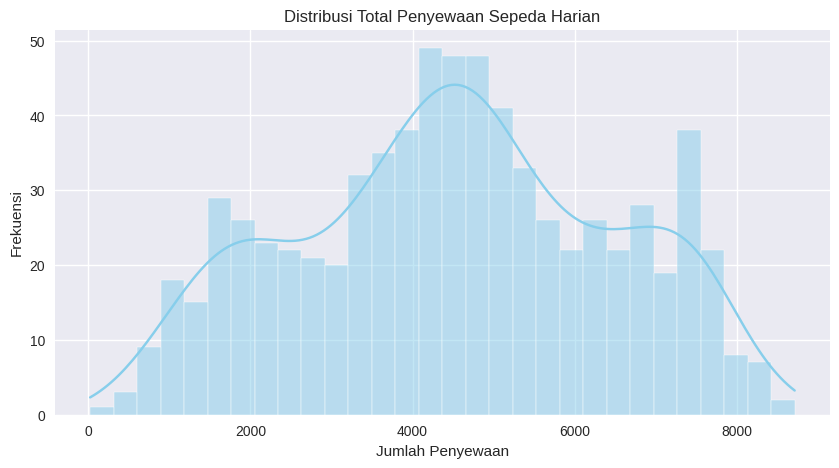

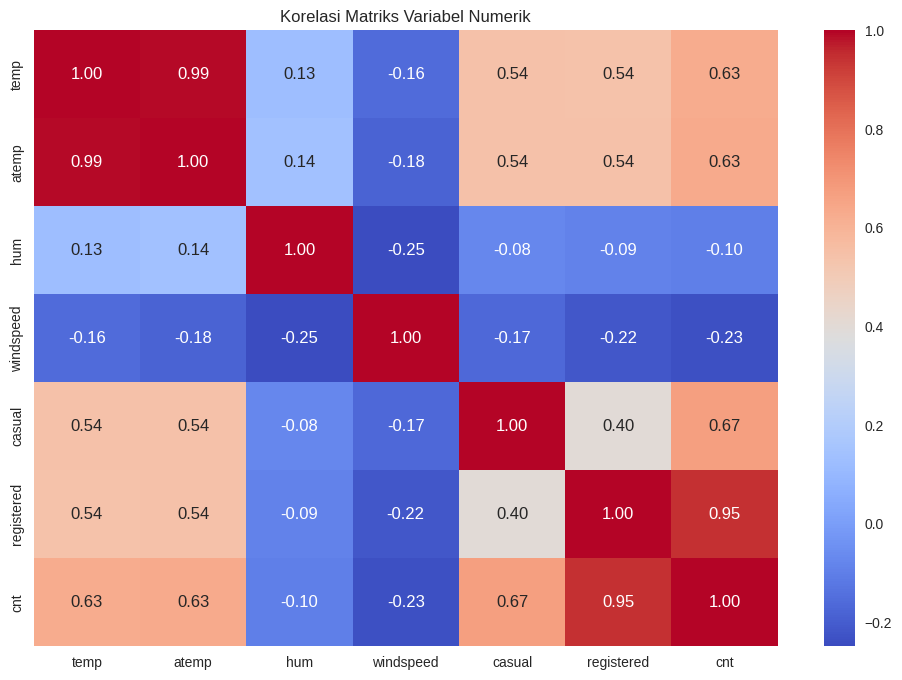

In [117]:
# Melihat distribusi total penyewaan (cnt)
plt.figure(figsize=(10, 5))
sns.histplot(day_df['cnt'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Total Penyewaan Sepeda Harian')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

# Melihat Korelasi antar variabel numerik
plt.figure(figsize=(12, 8))
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation = day_df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Matriks Variabel Numerik')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1 - 10124038 - Rafi Faris Faizi :

1. Pengaruh cuaca ekstrem terhadap penyewaan?

### Pertanyaan 2 - 10124038 - Rafi Faris Faizi :

2. Distribusi penyewaan berdasarkan hari dalam seminggu?

## Conclusion - 10124038 - Rafi Faris Faizi

- Conclution pertanyaan 1 :
Cuaca buruk (Hujan/Salju) menurunkan penyewaan secara drastis. Pada kondisi cuaca kategori 3 (Light Snow/Rain), penyewaan jatuh signifikan.
- conclution pertanyaan 2 :
Rata-rata penyewaan relatif stabil sepanjang minggu, namun sedikit lebih tinggi pada hari Jumat (5) dan Kamis (4).


Visualisasi jawaban 1 - 10124038 - Rafi Faris Faizi

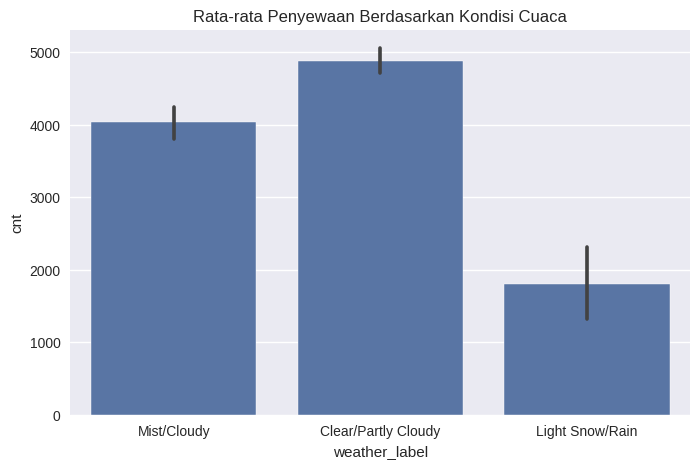

In [118]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weather_label', y='cnt', data=day_df, estimator=np.mean)
plt.title('Rata-rata Penyewaan Berdasarkan Kondisi Cuaca')
plt.show()

Visualisasi Jawaban 2 - 10124038 - Rafi Faris Faizi

/tmp/ipython-input-3075943723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=day_df, estimator=np.mean, palette='magma')


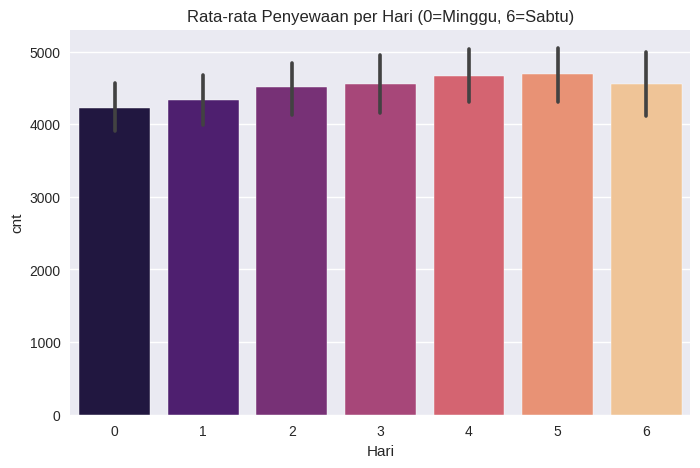

In [119]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weekday', y='cnt', data=day_df, estimator=np.mean, palette='magma')
plt.title('Rata-rata Penyewaan per Hari (0=Minggu, 6=Sabtu)')
plt.xlabel('Hari')
plt.show()

# Pertanyaan 3 - 10124027 - Muhammad Rifky Sandi Yudha :

  3.  Pada jam berapa saja terjadi lonjakan permintaan (peak hours)?

### Pertanyaan 4 - 10124027 - Muhammad Rifky Sandi Yudha :

4. Perbedaan pola workingday vs holiday?

### Conclusion - 10124027 - Muhammad Rifky Sandi Yudha

*   Pola jam menunjukkan bimodal distribution: puncak terjadi pada jam 8 pagi (berangkat kerja) dan jam 5-6 sore (pulang kerja).

*   Secara median, jumlah penyewaan pada hari kerja (Working Day) sedikit lebih tinggi dibandingkan hari libur, mengindikasikan penggunaan sepeda banyak untuk komuter.





### Visualisasi Jawaban 3 - 10124027 - Muhammad Rifky Sandi Yudha

/tmp/ipython-input-2960489587.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=hour_df, ci=None, marker='o', color='blue')


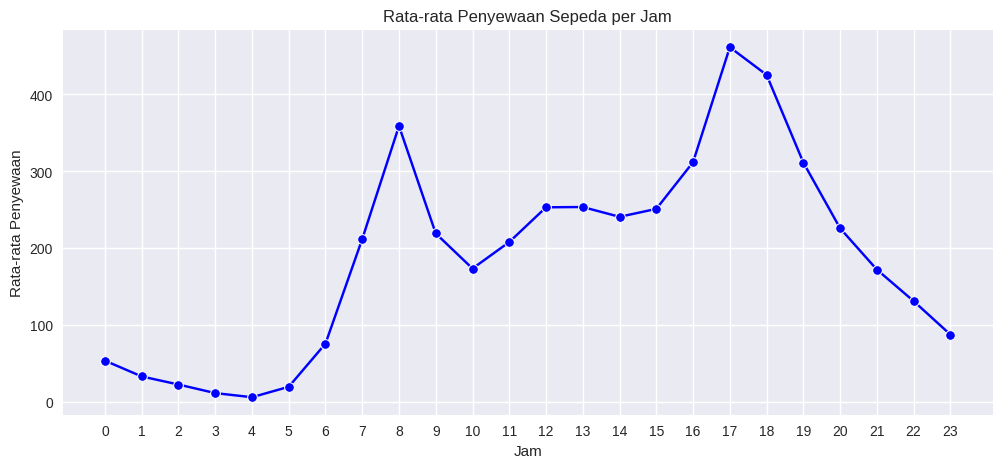

In [120]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='hr', y='cnt', data=hour_df, ci=None, marker='o', color='blue')
plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(0, 24))
plt.show()

### Visualisasi Jawaban 4 - 10124027 - Muhammad Rifky Sandi Yudha

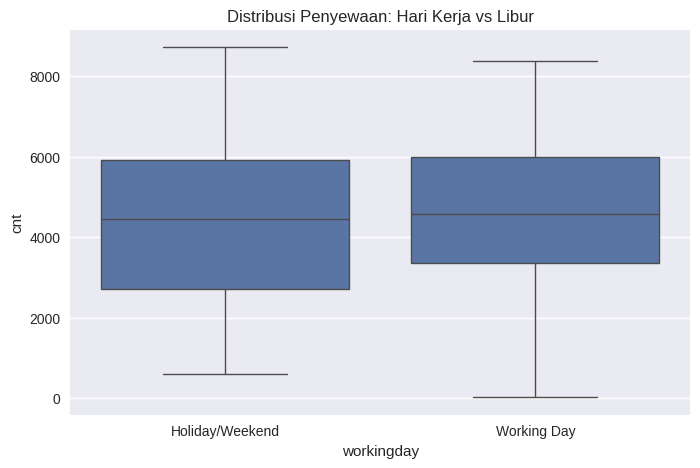

In [121]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.xticks([0, 1], ['Holiday/Weekend', 'Working Day'])
plt.title('Distribusi Penyewaan: Hari Kerja vs Libur')
plt.show()

### Pertanyaan 5 - 10124036 - Rizki Mardiansyah :

  5.  Musim apa yang memiliki tingkat penyewaan tertinggi?

### Pertanyaan 6 - 10124036 - Rizki Mardiansyah :

  6. Pengaruh kelembaban udara (humidity)?

### Conclusion - 10124036 - Rizki Mardiansyah

*   Musim Gugur (Fall) memiliki rata-rata penyewaan tertinggi, diikuti Musim Panas. Musim Semi (Spring) paling rendah.

*   Kelembaban memiliki korelasi negatif lemah. Jika terlalu lembab (hujan/mendung berat), penyewaan cenderung turun, namun tidak sekuat pengaruh suhu.



### Visualisasi Jawaban 5 - 10124036 - Rizki Mardiansyah

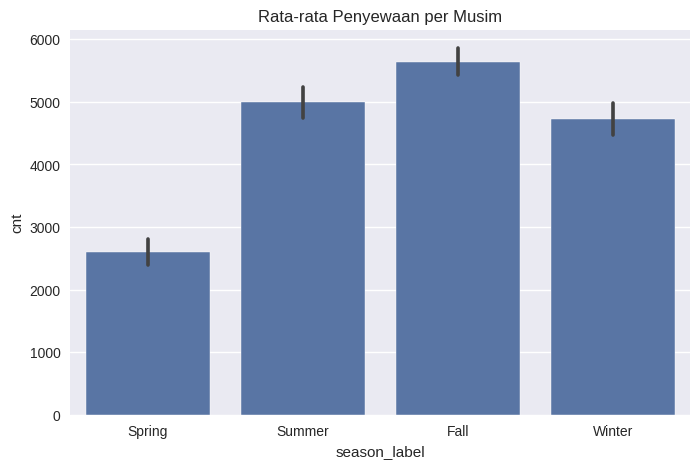

In [122]:
plt.figure(figsize=(8, 5))
sns.barplot(x='season_label', y='cnt', data=day_df, estimator=np.mean, order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Rata-rata Penyewaan per Musim')
plt.show()

### Visualisasi Jawban 6 - 10124036 - Rizki Mardiansyah

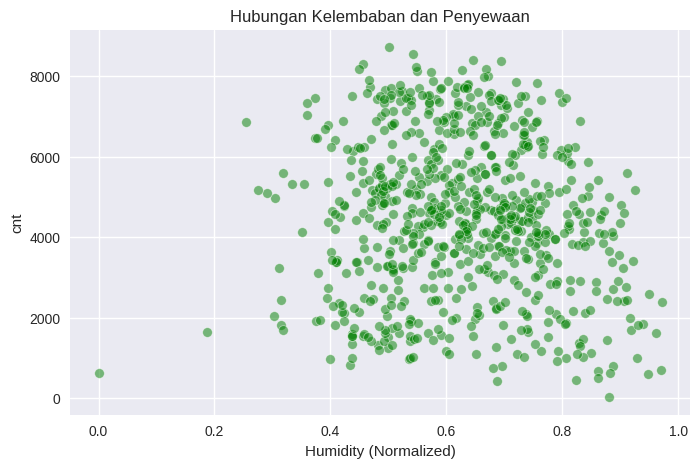

In [123]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='hum', y='cnt', data=day_df, alpha=0.5, color='green')
plt.title('Hubungan Kelembaban dan Penyewaan')
plt.xlabel('Humidity (Normalized)')
plt.show()

### Pertanyaan 7 - 10124016 - Adrian Mulya Wijaya :

7. Bagaimana performa penyewaan sepeda dalam beberapa tahun terakhir?

### Pertanyaan 8 - 10124016 - Adrian Mulya Wijaya :

8. Bagaimana korelasi antara suhu dengan jumlah penyewaan?

### Conclusion - 10124016 - Adrian Mulya Wijaya



*   Terlihat terjadi peningkatan signifikan jumlah penyewaan dari tahun 2011 ke 2012. Ini menunjukkan bisnis sedang tumbuh.


*   Terdapat korelasi positif yang kuat; semakin hangat suhu, semakin banyak orang menyewa sepeda. Namun, pada suhu yang ekstrem (sangat panas), tren mungkin sedikit menurun.





### Visualisasi Jawaban 7 - 10124016 - Adrian Mulya Wijaya

/tmp/ipython-input-846324516.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='yr_label', y='cnt', data=day_df, estimator=sum, ci=None, palette='viridis')
/tmp/ipython-input-846324516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='yr_label', y='cnt', data=day_df, estimator=sum, ci=None, palette='viridis')


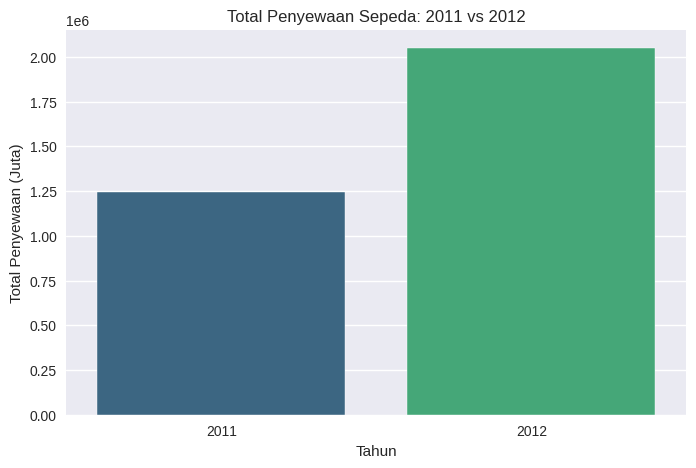

In [124]:
plt.figure(figsize=(8, 5))
sns.barplot(x='yr_label', y='cnt', data=day_df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Penyewaan Sepeda: 2011 vs 2012')
plt.xlabel('Tahun')
plt.ylabel('Total Penyewaan (Juta)')
plt.show()

### Visualisasi Jawaban 8 - 10124016 - Adrian Mulya Wijaya

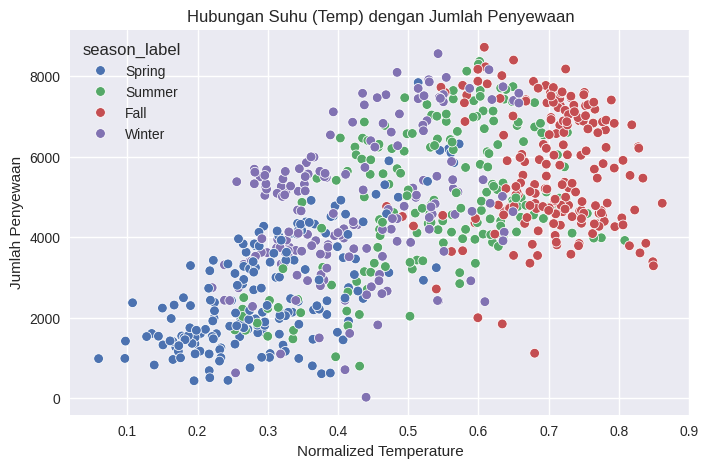

In [125]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=day_df, hue='season_label')
plt.title('Hubungan Suhu (Temp) dengan Jumlah Penyewaan')
plt.xlabel('Normalized Temperature')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 9 - 10124039 - Fajar Nur Alam :

9. Proporsi Registered vs Casual?

### Pertanyaan 10 - 10124039 - Fajar Nur Alam :

10. Pengaruh kecepatan angin (windspeed)?

### Conclusion - 10124039 - Fajar Nur Alam



*   Pengguna terdaftar (Registered) mendominasi penggunaan sepeda (>80%), menunjukkan loyalitas pelanggan atau penggunaan rutin (seperti bekerja).
*   Kecepatan angin memiliki korelasi negatif. Semakin kencang angin, semakin sedikit orang yang bersepeda, karena faktor kenyamanan dan keamanan.





### Visualisasi Jawaban 9 - 10124039 - Fajar Nur Alam

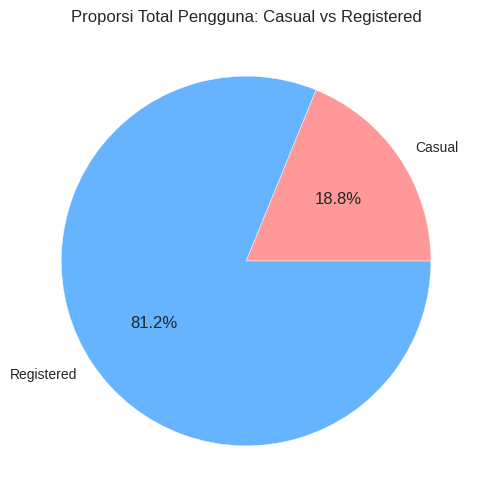

In [126]:
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()
plt.figure(figsize=(6, 6))
plt.pie([total_casual, total_registered], labels=['Casual', 'Registered'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Proporsi Total Pengguna: Casual vs Registered')
plt.show()

### Visualisasi Jawaban 10 - 10124039 - Fajar Nur Alam

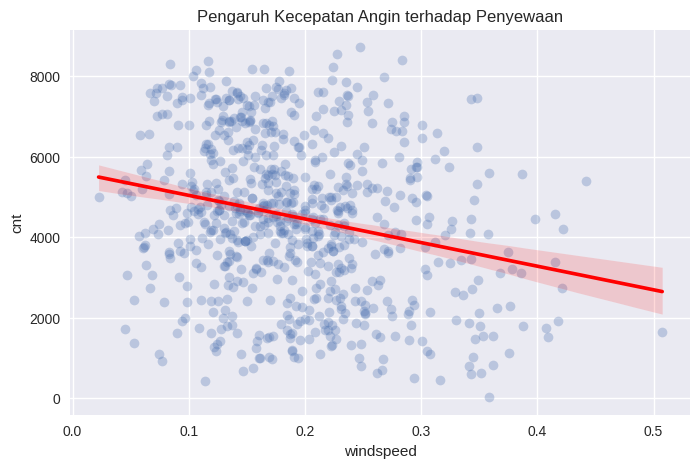

In [127]:
plt.figure(figsize=(8, 5))
sns.regplot(x='windspeed', y='cnt', data=day_df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Pengaruh Kecepatan Angin terhadap Penyewaan')
plt.show()

### Pertanyaan 11 - 10124480 - Joao Vong Tavares Soares da Silva :

11.  Pola penyewaan berdasarkan bulan?

###Pertanyaan 12 - 10124480 - Joao Vong Tavares Soares da Silva :

12.  Pola jam: Casual vs Registered?

### Conclusion - 10124480 - Joao Vong Tavares Soares da Silva



1.   Penyewaan memuncak di pertengahan tahun (Juni-September) dan turun di awal/akhir tahun (Januari/Desember).
2.   Insight Penting: Pengguna Registered memiliki dua puncak (8 pagi dan 5 sore) yang menandakan aktivitas komuter kerja. Pengguna Casual memiliki satu puncak landai di siang hari (jam 12-15), menandakan aktivitas wisata atau santai.





### Visualisasi Jawaban 11 - 10124480 - Joao Vong Tavares Soares da Silva

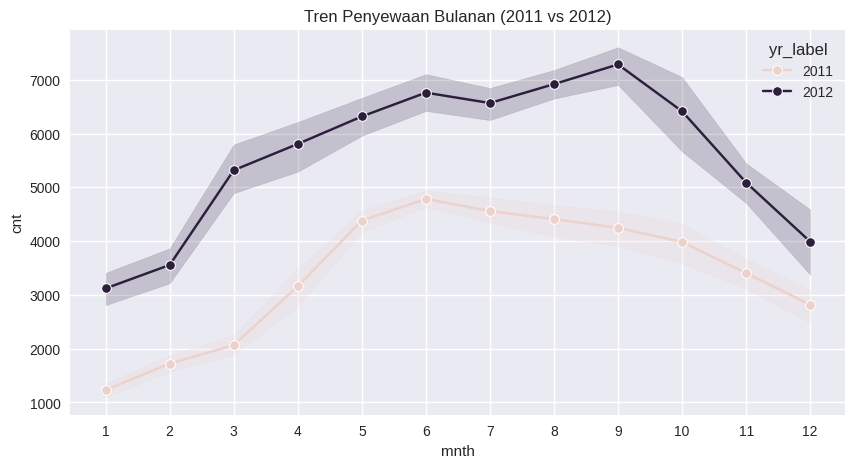

In [128]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='mnth', y='cnt', data=day_df, hue='yr_label', marker='o')
plt.title('Tren Penyewaan Bulanan (2011 vs 2012)')
plt.xticks(range(1, 13))
plt.show()

### Visualisasi Jawaban 12 - 10124480 - Joao Vong Tavares Soares da Silva

/tmp/ipython-input-2490279293.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='registered', data=hour_df, label='Registered', ci=None)
/tmp/ipython-input-2490279293.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='casual', data=hour_df, label='Casual', ci=None)


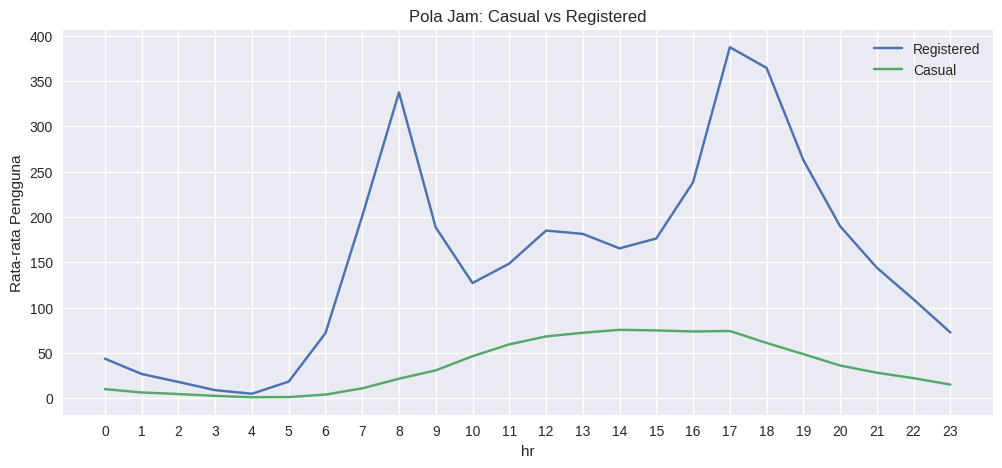

In [129]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='hr', y='registered', data=hour_df, label='Registered', ci=None)
sns.lineplot(x='hr', y='casual', data=hour_df, label='Casual', ci=None)
plt.title('Pola Jam: Casual vs Registered')
plt.ylabel('Rata-rata Pengguna')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

Analisis Lanjutan

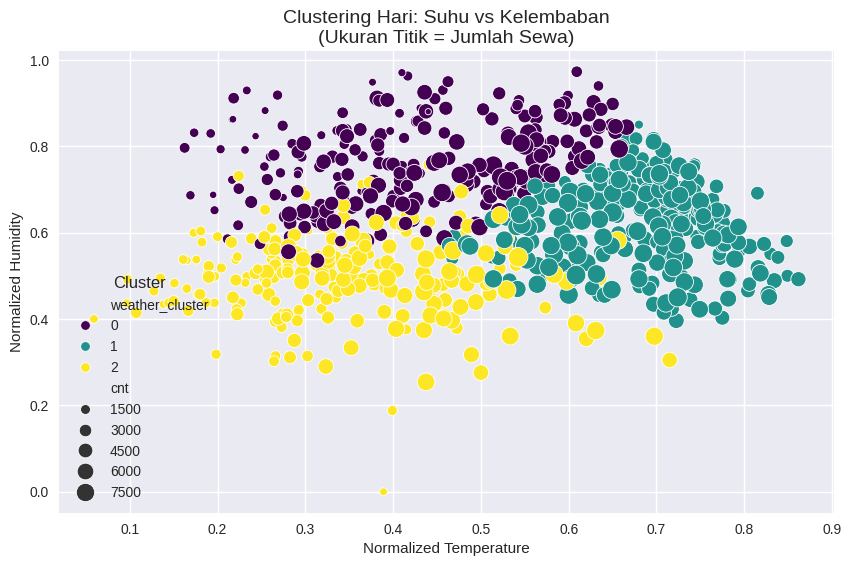

In [130]:
#K-Means Clustering
# Tujuan: Mengelompokkan hari berdasarkan Suhu, Kelembaban, dan Angin untuk mencari "Golden Days"

# 1. Pilih Fitur
X = day_df[['temp', 'hum', 'windspeed']].copy()

# 2. Standarisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. K-Means dengan 3 Cluster
kmeans = KMeans(n_clusters=3, random_state=42)
day_df['weather_cluster'] = kmeans.fit_predict(X_scaled)

# 4. Visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=day_df,
    x='temp',
    y='hum',
    hue='weather_cluster',
    size='cnt',
    sizes=(20, 200),
    palette='viridis'
)
plt.title('Clustering Hari: Suhu vs Kelembaban\n(Ukuran Titik = Jumlah Sewa)', fontsize=14)
plt.xlabel('Normalized Temperature')
plt.ylabel('Normalized Humidity')
plt.legend(title='Cluster')
plt.show()

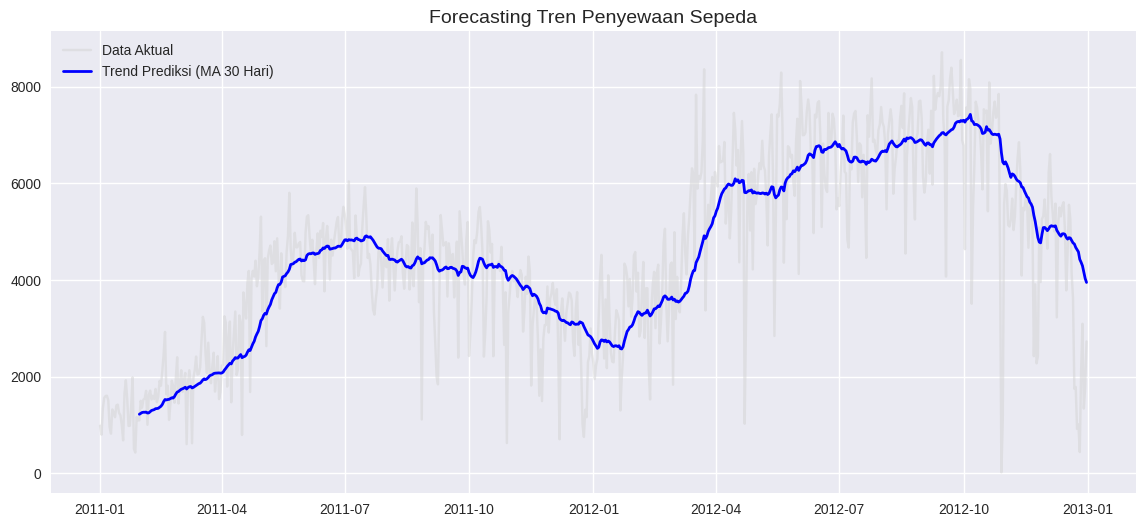

In [131]:
#Forecasting
# Tujuan: Prediksi tren menggunakan Moving Average (30 Hari)

window_size = 30
day_df['forecast_ma'] = day_df['cnt'].rolling(window=window_size).mean()

plt.figure(figsize=(14, 6))
plt.plot(day_df['dteday'], day_df['cnt'], label='Data Aktual', color='lightgray', alpha=0.5)
plt.plot(day_df['dteday'], day_df['forecast_ma'], label=f'Trend Prediksi (MA {window_size} Hari)', color='blue', linewidth=2)
plt.title('Forecasting Tren Penyewaan Sepeda', fontsize=14)
plt.legend()
plt.show()

In [132]:
#Geoanalysis
# Tujuan: Visualisasi Lokasi Stasiun Utama di Washington DC

# Koordinat Pusat Washington DC
dc_coords = [38.9072, -77.0369]
m = folium.Map(location=dc_coords, zoom_start=13)

# Data Stasiun Strategis
stations = [
    {"name": "Union Station", "lat": 38.8977, "lon": -77.0058, "type": "Transport Hub", "color": "red"},
    {"name": "White House", "lat": 38.8977, "lon": -77.0365, "type": "Tourist Spot", "color": "blue"},
    {"name": "Capitol Hill", "lat": 38.8898, "lon": -77.0091, "type": "Government", "color": "green"},
    {"name": "Dupont Circle", "lat": 38.9096, "lon": -77.0434, "type": "Business District", "color": "purple"},
    {"name": "Lincoln Memorial", "lat": 38.8893, "lon": -77.0502, "type": "Tourist Spot", "color": "blue"}
]

for station in stations:
    folium.Marker(
        location=[station['lat'], station['lon']],
        popup=f"<b>{station['name']}</b><br>Type: {station['type']}",
        tooltip=station['name'],
        icon=folium.Icon(color=station['color'], icon='bicycle', prefix='fa')
    ).add_to(m)

print("Peta Geoanalysis Berhasil Dibuat:")
m

Peta Geoanalysis Berhasil Dibuat:
